In [114]:
#Reading in and importing the tools and data I want to use
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import hypertools as hyp
from glob import glob as lsdir
import os
import re
import datetime as dt
import altair as alt
import plotly_express as px
from sklearn import linear_model
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split


%matplotlib inline

In [115]:
import plotly.graph_objs as go

In [116]:
#importing all of my data as csv files

season1314= pd.read_csv('season-1314_csv.csv')
season1415= pd.read_csv('season-1415_csv.csv')
season1516= pd.read_csv('season-1516_csv.csv')
season1617= pd.read_csv('season-1617_csv.csv')
season1718= pd.read_csv('season-1718_csv.csv')
season1819= pd.read_csv('season-1819_csv.csv')

In [117]:
season1314.head(20)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,2013-08-17,Arsenal,Aston Villa,1,3,A,1,1,D,A Taylor,...,4,4,15,18,4,3,4,5,1,0
1,2013-08-17,Liverpool,Stoke,1,0,H,1,0,H,M Atkinson,...,11,4,11,11,12,6,1,1,0,0
2,2013-08-17,Norwich,Everton,2,2,D,0,0,D,M Oliver,...,2,6,13,10,6,8,2,0,0,0
3,2013-08-17,Sunderland,Fulham,0,1,A,0,0,D,N Swarbrick,...,3,1,14,14,6,1,0,3,0,0
4,2013-08-17,Swansea,Man United,1,4,A,0,2,A,P Dowd,...,6,7,13,10,7,4,1,3,0,0
5,2013-08-17,West Brom,Southampton,0,1,A,0,0,D,K Friend,...,1,2,14,24,4,8,4,0,0,0
6,2013-08-17,West Ham,Cardiff,2,0,H,1,0,H,H Webb,...,4,1,10,7,4,3,0,1,0,0
7,2013-08-18,Chelsea,Hull,2,0,H,2,0,H,J Moss,...,5,2,7,16,5,1,0,1,0,0
8,2013-08-18,Crystal Palace,Tottenham,0,1,A,0,0,D,M Clattenburg,...,3,2,6,9,3,7,1,0,0,0
9,2013-08-19,Man City,Newcastle,4,0,H,2,0,H,A Marriner,...,11,1,9,7,8,1,2,3,0,1


In [118]:
list= [season1314, season1415, season1516, season1617, season1718, season1819]
all_seasons= pd.concat(list, ignore_index=True)

In [119]:
#Renaming relevant columns in UVLT individual data to be more easily readable
names={ 'HomeTeam' : 'Home',
        'AwayTeam' : 'Away',
        'FTHG' : 'Full Time Home Goals',
       'FTAG': 'Full Time Away Goals',
      'FTR': 'Full Time Result',
      'HTHG' : 'Half Time Home Goals',
      'HTAG' : 'Half Time Away Goals',
       'HTR': 'Half Time Result',
      'HS' : 'Home Shots',
      'AS' : 'Away Shots',
      'HST' : 'Home Shots on Target',
      'AST' : 'Away Shots on Target',
      'HF' : 'Home Fouls',
      'AF' : 'Away Fouls',
      'HY' : 'Home Yellow Cards',
      'AY' : 'Away Yellow Cards',
      'HR' : 'Home Red Cards',
      'AR' : 'Away Red Cards'}

all_seasons.rename(names, inplace=True, axis=1)

In [120]:

#Adds a column of all of the teams
teams= set()

def get_teams(y):
    for x in all_seasons[y]:
        teams.add(x)

get_teams('Home')
get_teams('Away')



In [121]:
teams

{'Arsenal',
 'Aston Villa',
 'Bournemouth',
 'Brighton',
 'Burnley',
 'Cardiff',
 'Chelsea',
 'Crystal Palace',
 'Everton',
 'Fulham',
 'Huddersfield',
 'Hull',
 'Leicester',
 'Liverpool',
 'Man City',
 'Man United',
 'Middlesbrough',
 'Newcastle',
 'Norwich',
 'QPR',
 'Southampton',
 'Stoke',
 'Sunderland',
 'Swansea',
 'Tottenham',
 'Watford',
 'West Brom',
 'West Ham',
 'Wolves'}

In [122]:
all_seasons['Teams']= all_seasons['Home'] + ' ' + all_seasons['Away']

In [123]:
all_seasons.head()

,Date,Home,Away,Full Time Home Goals,Full Time Away Goals,Full Time Result,Half Time Home Goals,Half Time Away Goals,Half Time Result,Referee,...,Away Shots on Target,Home Fouls,Away Fouls,HC,AC,Home Yellow Cards,Away Yellow Cards,Home Red Cards,Away Red Cards,Teams
0,2013-08-17,Arsenal,Aston Villa,1,3,A,1,1,D,A Taylor,...,4,15,18,4,3,4,5,1,0,Arsenal Aston Villa
1,2013-08-17,Liverpool,Stoke,1,0,H,1,0,H,M Atkinson,...,4,11,11,12,6,1,1,0,0,Liverpool Stoke
2,2013-08-17,Norwich,Everton,2,2,D,0,0,D,M Oliver,...,6,13,10,6,8,2,0,0,0,Norwich Everton
3,2013-08-17,Sunderland,Fulham,0,1,A,0,0,D,N Swarbrick,...,1,14,14,6,1,0,3,0,0,Sunderland Fulham
4,2013-08-17,Swansea,Man United,1,4,A,0,2,A,P Dowd,...,7,13,10,7,4,1,3,0,0,Swansea Man United


In [124]:
all_seasons_teams=all_seasons
home_seasons=all_seasons_teams.set_index('Home', inplace=False)

In [125]:
away_seasons=all_seasons_teams.set_index('Away', inplace=False)

In [132]:
# Code to separate out and group information by teams

ArsenalH=pd.DataFrame(home_seasons.loc['Arsenal'])
ArsenalA=pd.DataFrame(away_seasons.loc['Arsenal'])

In [134]:
ArsenalA

,Date,Home,Full Time Home Goals,Full Time Away Goals,Full Time Result,Half Time Home Goals,Half Time Away Goals,Half Time Result,Referee,Home Shots,...,Away Shots on Target,Home Fouls,Away Fouls,HC,AC,Home Yellow Cards,Away Yellow Cards,Home Red Cards,Away Red Cards,Teams
Away,,,,,,,,,,,,,,,,,,,,,
Arsenal,2013-08-24,Fulham,1,3,A,0,2,A,H Webb,16,...,7,10,8,1,8,2,2,0,0,Fulham Arsenal
Arsenal,2013-09-14,Sunderland,1,3,A,0,1,A,M Atkinson,17,...,6,12,10,6,7,1,2,0,0,Sunderland Arsenal
Arsenal,2013-09-28,Swansea,1,2,A,0,0,D,M Clattenburg,10,...,4,5,11,4,3,3,2,0,0,Swansea Arsenal
Arsenal,2013-10-06,West Brom,1,1,D,1,0,H,L Mason,12,...,5,6,11,6,2,1,2,0,0,West Brom Arsenal
Arsenal,2013-10-26,Crystal Palace,0,2,A,0,0,D,C Foy,13,...,4,12,8,4,3,0,0,0,1,Crystal Palace Arsenal
Arsenal,2013-11-10,Man United,1,0,H,1,0,H,M Oliver,5,...,2,12,11,5,6,2,3,0,0,Man United Arsenal
Arsenal,2013-11-30,Cardiff,0,3,A,0,1,A,L Mason,10,...,6,6,8,3,3,0,3,0,0,Cardiff Arsenal
Arsenal,2013-12-14,Man City,6,3,H,2,1,H,M Atkinson,22,...,6,12,6,8,8,2,1,0,0,Man City Arsenal
Arsenal,2013-12-26,West Ham,1,3,A,0,0,D,P Dowd,12,...,8,11,6,0,10,1,1,0,0,West Ham Arsenal


In [ ]:

def code_wins(team):
    wins =[]
    r=0
    for x in all_seasons_teams('Full Time Result'):
        if x == 'H' and all_seasons_teams.iloc[r, 0]== team:
            wins.append(3)
        elif x == 'A' and all_seasons_teams.iloc[r, 2]== team:
            wins.append(3)
        elif x == 'H' and all_seasons_teams.iloc[r, 0]=! team and all_seasons_teams.iloc[r, 2]== team:
            wins.append(0)
        elif x == 'A' and all_seasons_teams.iloc[r, 2]=! team and all_seasons_teams.iloc[r, 0]== team:
            wins.append(0)
        elif x == 'D' and all_seasons_teams.iloc[r, 0]== team or all_seasons_teams.iloc[r, 2]:
            wins.append(1)
        else:
            r = r
        r = r + 1
        
    all_seasons_teams('Results')= wins
code_wins()



In [66]:
avg_by_team = pd.DataFrame(all_seasons_teams.groupby('Home', as_index=True)['Full Time Home Goals'].mean())

In [67]:
avg_by_team['AVG Full Time Away Goals']= all_seasons_teams.groupby('Away', as_index=True)['Full Time Away Goals'].mean().values
avg_by_team['AVG Half Time Home Goals']= all_seasons_teams.groupby('Home', as_index=True)['Half Time Home Goals'].mean().values
avg_by_team['AVG Half Time Away Goals']= all_seasons_teams.groupby('Away', as_index=True)['Half Time Away Goals'].mean().values
avg_by_team['AVG Home Shots']= all_seasons_teams.groupby('Home', as_index=True)['Home Shots'].mean().values
avg_by_team['AVG Away Shots']= all_seasons_teams.groupby('Away', as_index=True)['Away Shots'].mean().values
avg_by_team['AVG Home Shots on Goal']= all_seasons_teams.groupby('Home', as_index=True)['Home Shots on Target'].mean().values
avg_by_team['AVG Away Shots on Goal']= all_seasons_teams.groupby('Away', as_index=True)['Away Shots on Target'].mean().values
avg_by_team['AVG Home Fouls']= all_seasons_teams.groupby('Home', as_index=True)['Home Fouls'].mean().values
avg_by_team['AVG Away Fouls']= all_seasons_teams.groupby('Away', as_index=True)['Away Fouls'].mean().values
avg_by_team['AVG Home Yellow']= all_seasons_teams.groupby('Home', as_index=True)['Home Yellow Cards'].mean().values
avg_by_team['AVG Away Yellow']= all_seasons_teams.groupby('Away', as_index=True)['Away Yellow Cards'].mean().values
avg_by_team.rename({'Full Time Home Goals' : 'Avg Full Time Home Goals'}, inplace=True, axis = 1)


In [73]:
avg_by_team.reset_index(inplace=True)

In [91]:
avg_by_team.head(20)

,Home,Avg Full Time Home Goals,AVG Full Time Away Goals,AVG Half Time Home Goals,AVG Half Time Away Goals,AVG Home Shots,AVG Away Shots,AVG Home Shots on Goal,AVG Away Shots on Goal,AVG Home Fouls,AVG Away Fouls,AVG Home Yellow,AVG Away Yellow
0,Arsenal,2.131579,1.622807,0.894737,0.692982,16.605263,12.605263,6.368421,4.605263,10.000000,9.885965,1.464912,1.657895
1,Aston Villa,0.947368,0.754386,0.526316,0.385965,11.596491,9.666667,3.543860,2.982456,10.859649,12.210526,1.719298,2.192982
2,Bournemouth,1.500000,1.144737,0.644737,0.578947,13.052632,10.921053,4.447368,3.763158,9.210526,9.263158,1.526316,1.342105
3,Brighton,1.131579,0.684211,0.473684,0.394737,10.973684,8.710526,3.263158,2.684211,11.026316,12.026316,1.763158,1.236842
4,Burnley,1.052632,0.894737,0.552632,0.394737,11.302632,9.342105,3.500000,2.907895,10.144737,10.223684,1.684211,1.855263
5,Cardiff,1.078947,0.657895,0.368421,0.184211,12.052632,9.947368,3.736842,2.894737,9.526316,9.578947,1.526316,1.473684
6,Chelsea,2.061404,1.561404,0.964912,0.701754,17.333333,13.929825,6.271930,4.491228,10.140351,10.096491,1.377193,1.728070
7,Crystal Palace,1.140351,1.184211,0.482456,0.377193,13.140351,10.736842,4.228070,3.394737,11.491228,11.982456,1.543860,1.842105
8,Everton,1.754386,1.122807,0.745614,0.456140,14.087719,11.254386,4.868421,4.070175,10.201754,11.008772,1.447368,1.543860
9,Fulham,1.210526,0.736842,0.421053,0.315789,14.210526,9.052632,4.736842,3.105263,10.131579,11.078947,1.736842,1.552632


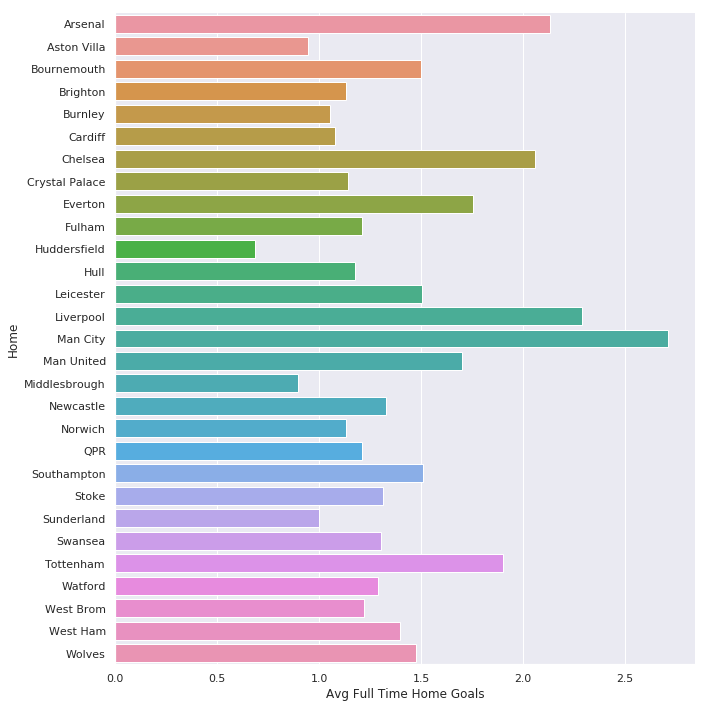

In [92]:
sns.catplot(x='Avg Full Time Home Goals', y='Home', data=avg_by_team, kind = 'bar', height=10)